# Análise exploratória

## Carregamento dos dados

Carrega as bibliotecas e os dados da base do Global Biotic Interations e da IUCN.

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

redlist_df = pd.read_csv("../../redlist_species_data_83aad1b1-09d6-4283-b629-0ccacb10797b/assessments.csv")
redlist_df

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,...,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
0,495630,10030,Hexanchus griseus,Near Threatened,A2bd,2020,2019-11-21 00:00:00 UTC,3.1,English,<p>The&#160;Bluntnose Sixgill Shark (<em>Hexan...,...,Decreasing,"The Bluntnose Sixgill Shark has a widespread, ...","<p>The species is utilized for its meat, liver...",Marine,"<p>Since 2010, the European Union Fisheries Co...",NaN,NaN,False,False,Global
1,495907,10041,Heosemys annandalii,Critically Endangered,A2cd+4cd,2021,2018-03-13 00:00:00 UTC,3.1,English,<p><em>Heosemys annandalii</em> is considered ...,...,Decreasing,<p>The range of <em>Heosemys annandalii</em> i...,The species is collected for local consumption...,Terrestrial|Freshwater (=Inland waters),<p><em>Heosemys annandalii </em>is included in...,Indomalayan,NaN,False,False,Global
2,497499,132523146,Hubbsina turneri,Critically Endangered,"B1ab(i,ii,iii,iv)+2ab(i,ii,iii,iv)",2019,2018-04-17 00:00:00 UTC,3.1,English,The Highland Splitfin is now only known to be ...,...,Decreasing,The Highland Splitfin is a freshwater fish spe...,The Highland Splitfin is not a target species ...,Freshwater (=Inland waters),No conservation actions targeting&#160;<em>Hub...,Neotropical,NaN,False,False,Global
3,497550,10267,Hungerfordia pelewensis,Endangered,"B1ab(ii,iii)+2ab(ii,iii)",2012,2011-08-22 00:00:00 UTC,3.1,English,"<p><span lang=""EN-US"">In recent surveys, the s...",...,Unknown,"<p><span lang=""EN-US"">This is a land snail end...",This species is not utilized.,Terrestrial,<p> </p><p> </p><p>Field work to define the ...,Oceanian,NaN,False,False,Global
4,498476,10769,Ictalurus mexicanus,Vulnerable,D2,2019,2018-12-06 00:00:00 UTC,3.1,English,<em>I. mexicanus </em>is herein categorized as...,...,Unknown,<p><em>Ictalurus mexicanus</em> is a species e...,This species is not utilised or traded.,Freshwater (=Inland waters),"<p>In Mexico,&#160;<em>Ictalurus mexicanus</em...",Neotropical,NaN,False,False,Global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50245,197564498,64563550,Filicium thouarsianum,Near Threatened,"B2ab(i,ii,iii)",2020,2020-03-28 00:00:00 UTC,3.1,English,<em>Filicium</em> <em>thouarsianum </em>is<em>...,...,Decreasing,<em>Filicium</em> <em>thouarsianum</em>&#160;i...,There is no reported use information for the s...,Terrestrial,"The species occurs in <span class=""ItemText"">A...",Afrotropical,NaN,False,False,Global
50246,197565732,46486,Melanophylla angustior,Endangered,"A3c; B2ab(ii,iii,v)",2020,2020-06-17 00:00:00 UTC,3.1,English,"<em>Melanophylla</em> <em>angustior,</em> smal...",...,Decreasing,<em>Melanophylla</em> <em>angustior</em> endem...,There is no reported use information of this s...,Terrestrial,There are two subpopulations known for the spe...,Afrotropical,NaN,False,False,Global
50247,197569838,46489,Melanophylla madagascariensis,Endangered,B1ab(iii)+2ab(iii),2020,2020-03-26 00:00:00 UTC,3.1,English,<em><em><em><em>Melanophylla</em> <em>madagasc...,...,Decreasing,<em>Melanophylla</em> <em>madagascariensis </e...,There is no reported use information for this ...,Terrestrial,One known subpopulation is recorded within Bet...,Afrotropical,NaN,False,False,Global
50248,197570616,46490,Melanophylla modestei,Endangered,"A3c; B2ab(ii,iii,iv,v)",2020,2020-03-25 00:00:00 UTC,3.1,English,<em>Melanophylla</em> <em>modestei </em>is a t...,...,Decreasing,<em>Melanophylla</em> <em>modestei </em>is end...,There is no reported use information for this ...,Terrestrial,The species is known from Makira and Masoala p...,Afrotropical,NaN,False,False,Global


In [3]:
interactions_df = pd.read_csv('../../clean-interactions.csv')
interactions_df

,sourceTaxonSpeciesName,sourceTaxonKingdomName,interactionTypeName,targetTaxonSpeciesName,targetTaxonKingdomName
0,Andrena milwaukeensis,Animalia,visitsFlowersOf,Zizia aurea,Plantae
1,Andrena mandibularis,Animalia,visitsFlowersOf,Zanthoxylum americanum,Plantae
2,Andrena edwardsi,Animalia,visitsFlowersOf,Wyethia mollis,Plantae
3,Andrena mandibularis,Animalia,visitsFlowersOf,Viburnum dentatum,Plantae
4,Andrena milwaukeensis,Animalia,visitsFlowersOf,Viburnum lentago,Plantae
...,...,...,...,...,...
3835700,Calyptra orthograpta,Animalia,eats,Bubalus bubalis,Animalia
3835701,Calyptra orthograpta,Animalia,eats,Cervus unicolor,Animalia
3835702,Calyptra orthograpta,Animalia,eats,Elephas maximus,Animalia
3835703,Calyptra pseudobicolor,Animalia,eats,Homo sapiens,Animalia


## Distribuição da tendência das populações presentes na lista da IUCN

Os dados apresentados pela Red List ainda contém dados como a tendência de crescimento das populações das espécies listadas. Nesse caso, o gráfico abaixo mostra que a população da maior parte das espécies listadas está em queda, com somente uma pequena parcela apresentando algum aspecto de crescimento ou estabilidade.

<AxesSubplot:title={'center':'Distribuição das tendências de crescimento das populações'}, ylabel='populationTrend'>

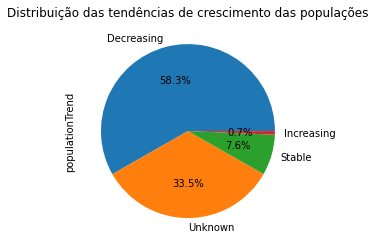

In [4]:
redlist_df.populationTrend.value_counts().plot.pie(title='Distribuição das tendências de crescimento das populações', autopct='%1.1f%%')

## Distribuição das categorias da Red List da IUCN

Além do fato da maior parte das espécies listadas estar em queda, outro fator preocupante é a posição nas categorias da Red List. Como mostra o gráfico abaixo, a maior parte dos animais está em uma situação de vulnerabilidade ou até já em grande perigo.

In [40]:
qtd_reslist_category = redlist_df.redlistCategory.value_counts()
qtd_reslist_category

Vulnerable                           16447
Endangered                           15014
Critically Endangered                 8697
Near Threatened                       8056
Extinct                                942
Lower Risk/near threatened             764
Lower Risk/conservation dependent      189
Extinct in the Wild                     85
Regionally Extinct                      56
Name: redlistCategory, dtype: int64

<AxesSubplot:title={'center':'Distribuição das categorias da Red List'}>

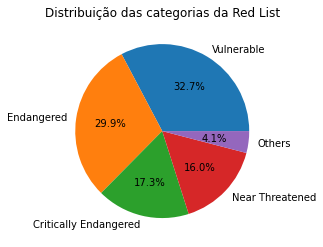

In [48]:
others_row = pd.Series({'Others': qtd_reslist_category[4:].sum()})
qtd_reslist_category_df = pd.concat([qtd_reslist_category[:4], others_row])
qtd_reslist_category_df.plot.pie(title='Distribuição das categorias da Red List', autopct='%1.1f%%', ylabel='')

## Ocorrência de uma espécie como fonte de uma interação

As fontes de uma interação são as espécies que efetuam a ação da interação. Um exemplo é a primeira interação da tabela, onde é indicado que a Andrena milwaukeensis, um tipo de abelha, é a fonte de uma interação onde ela visita a Zizia aurea, uma flor.

Como é possível ver abaixo, as duas primeiras posições são o Gadus morhua e Gadus macrocephalus, dois peixes. No entanto, logo na terceira posição já é possível encontrar um vírus. Ao contrário do que talvez pudesse se imaginar, o ser humano não aparece entre as primeiras posições como fontes de interações.

In [6]:
interactions_df.sourceTaxonSpeciesName.value_counts()

Gadus morhua                                             104765
Gadus macrocephalus                                       51895
Severe acute respiratory syndrome-related coronavirus     50114
Athene cunicularia                                        47600
Bubo virginianus                                          40417
                                                          ...  
Sphaeropsis cymbispora                                        1
Bat astrovirus Ms/Anhui/A909/2005                             1
Heterocapsa rotunda                                           1
Umbilicaria vellea                                            1
Trichogramma aldanense                                        1
Name: sourceTaxonSpeciesName, Length: 140728, dtype: int64

<AxesSubplot:title={'center':'Quantidade de interações como fonte para cada espécie'}>

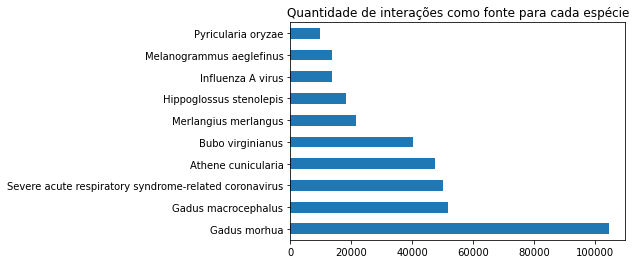

In [58]:
interactions_df.sourceTaxonSpeciesName.value_counts()[:10].plot.barh(title='Quantidade de interações como fonte para cada espécie')

## Ocorrência de uma espécie como alvo de uma interação

A fonte de uma interação é que sofre a ação da interação. Assim, com base no exemplo anterior, o alvo seria a planta visitada pela abelha.

Como é possível ver abaixo, surpreendentemente, a espécie mais atingida por ações é o ser humano.

In [7]:
interactions_df.targetTaxonSpeciesName.value_counts()

Homo sapiens                149770
Peromyscus maniculatus       50955
Mus musculus                 36587
Bos taurus                   28371
Sus scrofa                   27066
                             ...  
Adiantum jordanii                1
Cynomolgous                      1
Atropa belladona                 1
Heteroclinus whiteleggii         1
Hyoscyamus aureus                1
Name: targetTaxonSpeciesName, Length: 95331, dtype: int64

<AxesSubplot:title={'center':'Quantidade de interações como alvo para cada espécie'}>

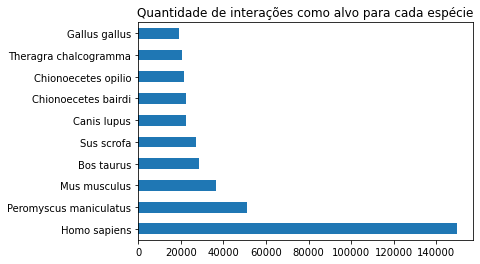

In [59]:
interactions_df.targetTaxonSpeciesName.value_counts()[:10].plot.barh(title='Quantidade de interações como alvo para cada espécie')

Para entender melhor como o ser humano alcançou esse posto de espécie que é o maior alvo de interações, vamos verificar o tipo das interações sofridas pelo ser humano. Como mostra o gráfico abaixo, a parte majoritária dessas interações parecem ser com vírus e outros patógenos.

In [35]:
human_target_interactions = interactions_df.query("targetTaxonSpeciesName == 'Homo sapiens'").interactionTypeName.value_counts()
human_target_interactions

hasHost            126698
pathogenOf          19655
interactsWith        1478
parasiteOf            963
eats                  860
endoparasiteOf         53
ectoparasiteOf         51
visits                  3
guestOf                 2
livesOn                 2
visitsFlowersOf         2
preysOn                 2
livesInsideOf           1
Name: interactionTypeName, dtype: int64

<AxesSubplot:title={'center':'Interações que têm como alvo o ser humano'}>

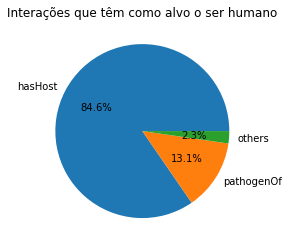

In [50]:
others_row = pd.Series({'others': human_target_interactions[2:].sum()})
human_target_interactions_df = pd.concat([human_target_interactions[:2], others_row])
human_target_interactions_df.plot.pie(title='Interações que têm como alvo o ser humano', autopct='%1.1f%%', ylabel='')

## Interações entre as espécies em perigo crítico

Combinando os dados de ambas as bases, é possível observar a relação de espécies em perigo com os demais animais. Nesse caso abaixo, foram observadas as interações que tinham como alvo animais listados como criticamente em perigo. A ideia é ter uma noção de como esses animais, que já estão em alto perigo de extinção, podem impactar em outras espécies.

In [9]:
# Cria um novo dataframe adicionando uma coluna contendo a categoria da redlist para as espécies alvo de cada interação
target_category_df = interactions_df.join(redlist_df.set_index('scientificName')['redlistCategory'], on='targetTaxonSpeciesName')

Com esses dados das interações e da categoria das espécies alvo na lista da IUCN, foi criado o grafo abaixo mostrando a relação das espécies criticamente em perigo com as demais espécies. Nessa figura, é possível perceber que o grafo obtido não é completamente conectado, ou seja, há alguns casos de interações isoladas, onde o impacto parece ser menor. No entanto, vale destacar para estes casos que foram utilizadas somente as interações com espécies criticamente em perigo, então pode ser que haja mais interações para aqueles casos isolados que acabem não sendo exibidas nesse grafo. Por outro lado, é possível perceber também que há espécies que estão ligadas há mais de uma espécie em perigo. Assim, caso uma espécie em perigo seja extinta, ela pode até mesmo acelerar a extinção de uma outra espécie que já está em grande perigo.

/home/lucasnolasco/.local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


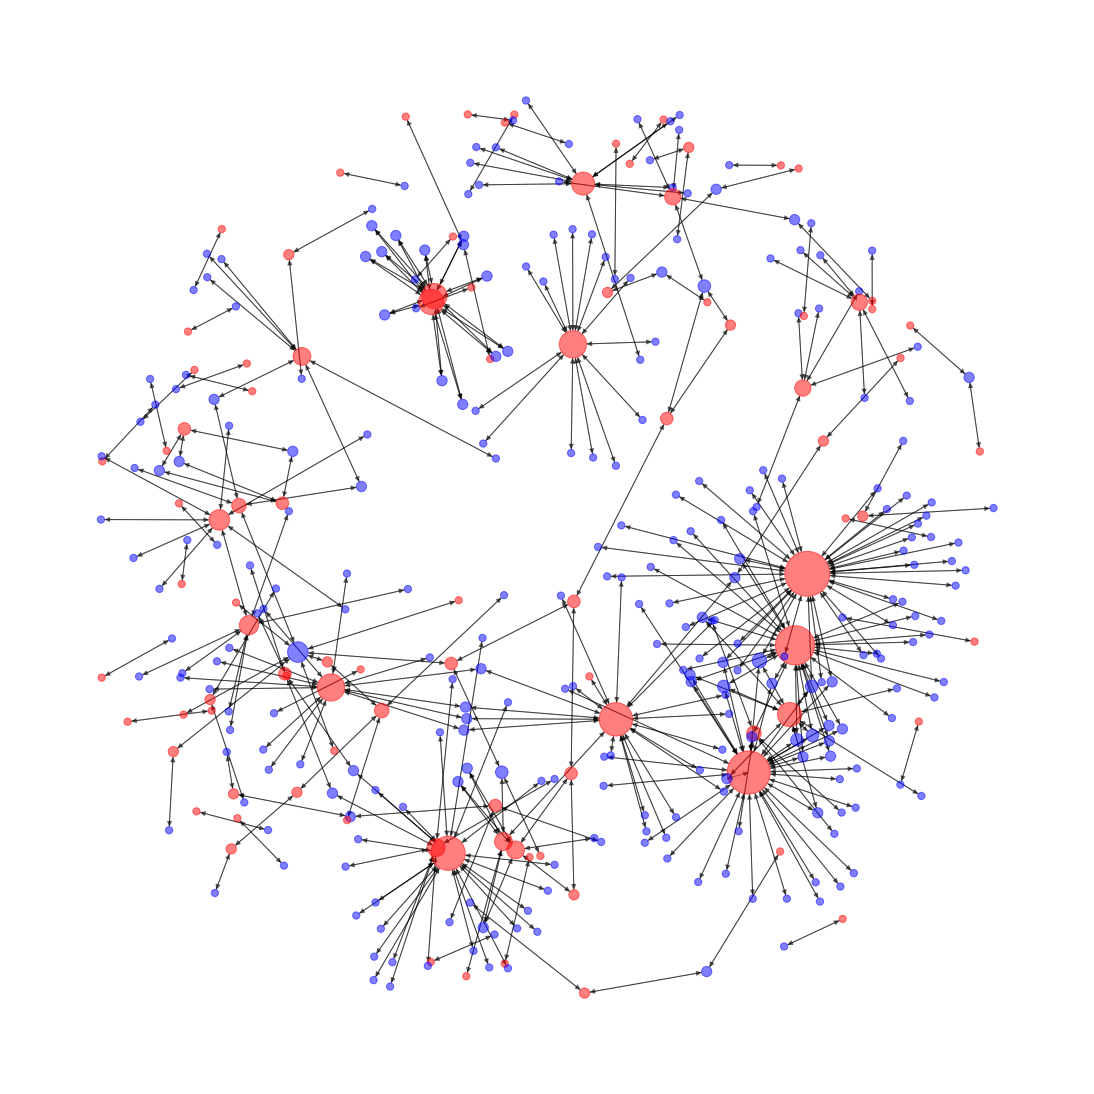

In [10]:
df1 = target_category_df.query("redlistCategory == 'Critically Endangered' and interactionTypeName == 'eats' and sourceTaxonSpeciesName != `targetTaxonSpeciesName`")[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']]

G = nx.Graph()
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')

G = nx.DiGraph(G) # Define o grafo como um grafo direcionado

plt.figure(figsize=(15, 15))

degree_centrality=nx.degree_centrality(G) # Calcula o tamanho dos nós com base na quantidade de conexões que cada um tem
nx.set_node_attributes(G, degree_centrality, 'degree_centr')
node_sizes = [v * 10000 for v in degree_centrality.values()]

pos = nx.spring_layout(G, k=0.2) # Calcula as posições onde os nós serão exibidos

# nx.draw_networkx_labels(G, pos, font_size = 9) # Os rótulos não foram desenhados para não atrapalhar a visualização

# Pinta os nós das espécies em perigo de vermelho enquanto mantém os demais em azul
colors = []
critically_endangered_species = redlist_df.query("redlistCategory == 'Critically Endangered'")
for node in G:
    if sum(critically_endangered_species.scientificName.str.contains(node)) > 0:
        colors.append('red')
    else:
        colors.append('blue')

nx.draw(G, pos, node_size=node_sizes, node_color=colors, alpha = 0.5, edge_color='black') # Exibe o grafo

Para ter uma ideia mais clara da influência de cada uma das espécies, foi calculado o grau de cada um dos nós, o que é baseado na quantidade de conexões que ele apresenta. Assim, os nós encontrados com mais conexões foram a `Castanea dentata`, uma planta de origem americana que produz castanhas, a `Fraxinus americana`, uma árvore também encontrada na América do Norte, e a `Fraxinus Pennsylvanica`. Coincidentemente ou não, as três primeiras espécies em perigo com maior influência nesse grafo gerado são plantas geralmente encontradas na América do Norte, o que pode indicar uma tendência a ser investigada.

In [12]:
degree_df = pd.DataFrame.from_dict(degree_centrality, columns=['Degree'], orient='index')
degree_df.sort_values(by='Degree', ascending=False)

,Degree
Castanea dentata,0.202667
Fraxinus americana,0.186667
Fraxinus pennsylvanica,0.154667
Eleutherodactylus eneidae,0.117333
Anguilla anguilla,0.112000
...,...
Corvus albus,0.005333
Foudia aldabrana,0.005333
Hypsipetes madagascariensis,0.005333
Pteropus aldabrensis,0.005333


<AxesSubplot:title={'center':'Espécies com os maiores graus de centralidade'}>

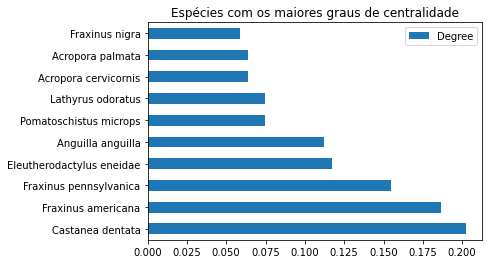

In [63]:
degree_df.sort_values(by='Degree', ascending=False)[:10].plot.barh(title='Espécies com os maiores graus de centralidade')